In [1]:
import numpy as np

In [2]:
import pandas as pd

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
%matplotlib inline

sns.set_style('whitegrid')

In [91]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px solid;
    border-color: #0099cc;
}
</style>

In [3]:
column_name = ['user_id', 'item_id', 'rating', 'timestamp']

In [5]:
df = pd.read_csv('u.data', sep='\t', names=column_name)

In [42]:
df.head()

user_id  item_id  rating  timestamp             title
0        0       50       5  881250949  Star Wars (1977)
1      290       50       5  880473582  Star Wars (1977)
2       79       50       4  891271545  Star Wars (1977)
3        2       50       5  888552084  Star Wars (1977)
4        8       50       5  879362124  Star Wars (1977)

In [7]:
movie_titles = pd.read_csv('Movie_Id_Titles')

In [8]:
movie_titles.head()

item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)

In [9]:
df = pd.merge(df, movie_titles, on='item_id')

In [12]:
df.tail(10)

user_id  item_id  rating  timestamp  \
99993       416     1594       5  893212484   
99994       648     1626       1  884795447   
99995       655     1645       4  892871225   
99996       747     1659       1  888733313   
99997       916     1682       3  880845755   
99998       840     1674       4  891211682   
99999       655     1640       3  888474646   
100000      655     1637       3  888984255   
100001      655     1630       3  887428735   
100002      655     1641       3  887427810   

                                                    title  
99993                                      Everest (1998)  
99994          Nobody Loves Me (Keiner liebt mich) (1994)  
99995                             Butcher Boy, The (1998)  
99996                     Getting Away With Murder (1996)  
99997           Scream of Stone (Schrei aus Stein) (1991)  
99998                                   Mamma Roma (1962)  
99999                              Eighth Day, The (1996)  
100000                                  Girls Town (1996)  
100001  Silence of the Palace, The (Saimt el Qusur) (1...  
100002                                    Dadetown (1995)

In [18]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [19]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [20]:
rating  = pd.DataFrame(df.groupby('title')['rating'].mean())

In [21]:
rating.head()

rating
title                              
'Til There Was You (1997)  2.333333
1-900 (1994)               2.600000
101 Dalmatians (1996)      2.908257
12 Angry Men (1957)        4.344000
187 (1997)                 3.024390

In [22]:
rating['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [23]:
rating.head()

rating  num of ratings
title                                              
'Til There Was You (1997)  2.333333               9
1-900 (1994)               2.600000               5
101 Dalmatians (1996)      2.908257             109
12 Angry Men (1957)        4.344000             125
187 (1997)                 3.024390              41

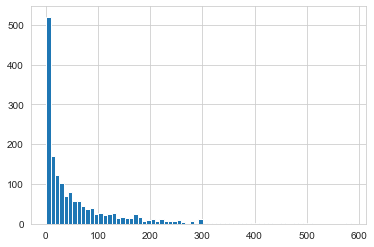

In [26]:
rating['num of ratings'].hist(bins=70)

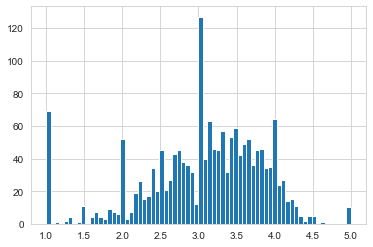

In [27]:
rating['rating'].hist(bins=70)

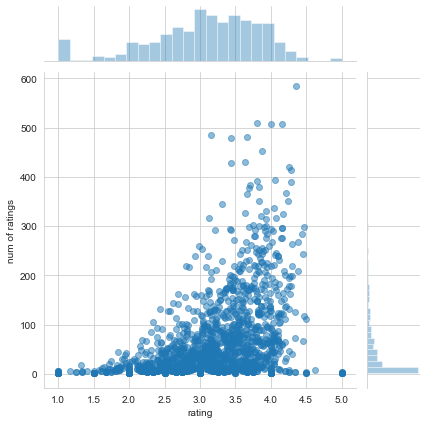

In [32]:
sns.jointplot(x='rating', y='num of ratings', data=rating, alpha=0.5)

In [33]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')

In [34]:
moviemat.head()

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
0                              NaN           NaN                    NaN   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
0                        NaN         NaN                          NaN   
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
0                                        NaN                           NaN   
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   

title    ...  Yankee Zulu (1994)  Year of the Horse (1997)  \
user_id  ...                                                 
0        ...                 NaN                       NaN   
1        ...                 NaN                       NaN   
2        ...                 NaN                       NaN   
3        ...                 NaN                       NaN   
4        ...                 NaN                       NaN   

title    You So Crazy (1994)  Young Frankenstein (1974)  Young Guns (1988)  \
user_id                                                                      
0                        NaN                        NaN                NaN   
1                        NaN                        5.0                3.0   
2                        NaN                        NaN                NaN   
3                        NaN                        NaN                NaN   
4                        NaN                        NaN                NaN   

title    Young Guns II (1990)  Young Poisoner's Handbook, The (1995)  \
user_id                                                                
0                         NaN                                    NaN   
1                         NaN                                    NaN   
2                         NaN                                    NaN   
3                         NaN                                    NaN   
4                         NaN                                    NaN   

title    Zeus and Roxanne (1997)  unknown  Á köldum klaka (Cold Fever) (1994)  
user_id                                                                        
0                            NaN      NaN                                 NaN  
1                            NaN      4.0                                 NaN  
2                            NaN      NaN                    

In [35]:
rating.sort_values('num of ratings', ascending=False).head(10)

rating  num of ratings
title                                                  
Star Wars (1977)               4.359589             584
Contact (1997)                 3.803536             509
Fargo (1996)                   4.155512             508
Return of the Jedi (1983)      4.007890             507
Liar Liar (1997)               3.156701             485
English Patient, The (1996)    3.656965             481
Scream (1996)                  3.441423             478
Toy Story (1995)               3.878319             452
Air Force One (1997)           3.631090             431
Independence Day (ID4) (1996)  3.438228             429

In [36]:
starwars_user_rating = moviemat['Star Wars (1977)']
liarliar_user_rating = moviemat['Liar Liar (1997)']

In [52]:
starwars_user_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [53]:
liarliar_user_rating.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

In [62]:
similar_to_starwars = moviemat.corrwith(starwars_user_rating)

c:\python\dev\env\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\python\dev\env\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [64]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_rating)

c:\python\dev\env\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\python\dev\env\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [80]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['correlation'])
corr_starwars.dropna(inplace=True)

In [81]:
corr_starwars.head()

correlation
title                                 
'Til There Was You (1997)     0.872872
1-900 (1994)                 -0.645497
101 Dalmatians (1996)         0.211132
12 Angry Men (1957)           0.184289
187 (1997)                    0.027398

In [82]:
corr_starwars = corr_starwars.join(rating['num of ratings'])

In [83]:
corr_starwars.head()

correlation  num of ratings
title                                                 
'Til There Was You (1997)     0.872872               9
1-900 (1994)                 -0.645497               5
101 Dalmatians (1996)         0.211132             109
12 Angry Men (1957)           0.184289             125
187 (1997)                    0.027398              41

In [84]:
corr_starwars[corr_starwars['num of ratings'] > 100].sort_values('correlation', ascending=False).head(10)

correlation  \
title                                                             
Star Wars (1977)                                       1.000000   
Empire Strikes Back, The (1980)                        0.748353   
Return of the Jedi (1983)                              0.672556   
Raiders of the Lost Ark (1981)                         0.536117   
Austin Powers: International Man of Mystery (1997)     0.377433   
Sting, The (1973)                                      0.367538   
Indiana Jones and the Last Crusade (1989)              0.350107   
Pinocchio (1940)                                       0.347868   
Frighteners, The (1996)                                0.332729   
L.A. Confidential (1997)                               0.319065   

                                                    num of ratings  
title                                                               
Star Wars (1977)                                               584  
Empire Strikes Back, The (1980)                                368  
Return of the Jedi (1983)                                      507  
Raiders of the Lost Ark (1981)                                 420  
Austin Powers: International Man of Mystery (1997)             130  
Sting, The (1973)                                              241  
Indiana Jones and the Last Crusade (1989)                      331  
Pinocchio (1940)                                               101  
Frighteners, The (1996)                                        115  
L.A. Confidential (1997)                                       297

In [85]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns=['correlation'])
corr_liarliar.dropna(inplace=True)

In [86]:
corr_liarliar.head()

correlation
title                                   
'Til There Was You (1997)       0.118913
101 Dalmatians (1996)           0.469765
12 Angry Men (1957)             0.066272
187 (1997)                      0.175145
2 Days in the Valley (1996)     0.040739

In [87]:
corr_liarliar = corr_liarliar.join(rating['num of ratings'])

In [88]:
corr_liarliar.head(10)

correlation  num of ratings
title                                                           
'Til There Was You (1997)               0.118913               9
101 Dalmatians (1996)                   0.469765             109
12 Angry Men (1957)                     0.066272             125
187 (1997)                              0.175145              41
2 Days in the Valley (1996)             0.040739              93
20,000 Leagues Under the Sea (1954)    -0.027932              72
2001: A Space Odyssey (1968)           -0.057864             259
39 Steps, The (1935)                    0.400918              59
8 1/2 (1963)                            0.178064              38
A Chef in Love (1996)                   0.000000               8

In [89]:
corr_liarliar[corr_liarliar['num of ratings'] > 100].sort_values('correlation', ascending=False).head(10)

correlation  num of ratings
title                                                                 
Liar Liar (1997)                              1.000000             485
Batman Forever (1995)                         0.516968             114
Mask, The (1994)                              0.484650             129
Down Periscope (1996)                         0.472681             101
Con Air (1997)                                0.469828             137
Pretty Woman (1990)                           0.469790             164
101 Dalmatians (1996)                         0.469765             109
Michael (1996)                                0.442022             119
Waterworld (1995)                             0.438405             102
Indiana Jones and the Last Crusade (1989)     0.414427             331